
Training with Entropy:

Decision Tree Accuracy: 0.68

Classification Report:
               precision    recall  f1-score   support

           B       0.00      0.00      0.00        11
           L       0.67      0.73      0.70        55
           R       0.69      0.76      0.73        59

    accuracy                           0.68       125
   macro avg       0.45      0.50      0.47       125
weighted avg       0.62      0.68      0.65       125



c:\Users\hebal\Documents\Repos\Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hebal\Documents\Repos\Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hebal\Documents\Repos\Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

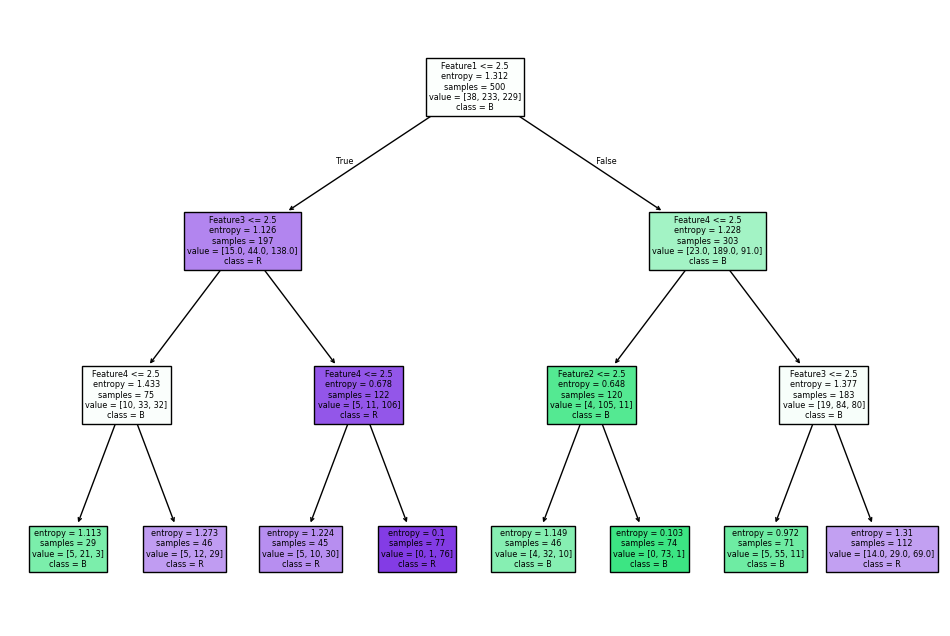


Training with Gini:

Decision Tree Accuracy: 0.768

Classification Report:
               precision    recall  f1-score   support

           B       0.00      0.00      0.00        11
           L       0.75      0.87      0.81        55
           R       0.79      0.81      0.80        59

    accuracy                           0.77       125
   macro avg       0.51      0.56      0.54       125
weighted avg       0.70      0.77      0.73       125



c:\Users\hebal\Documents\Repos\Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hebal\Documents\Repos\Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hebal\Documents\Repos\Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

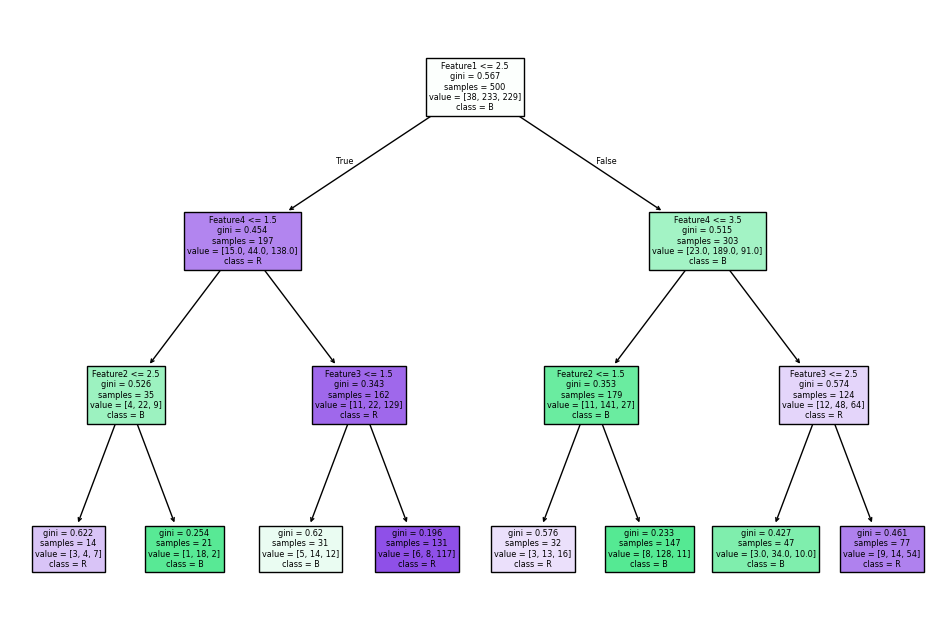

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree


def import_data():
    balance_data = pd.read_csv(
        'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',
        sep=',', header=None
    )
    return balance_data


def split_dataset(balance_data):
    X = balance_data.values[:, 1:5]  
    Y = balance_data.values[:, 0]    

    # Split (80% Train, 20% Test)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    return X_train, X_test, Y_train, Y_test

def train_decision_tree(X_train, Y_train, criterion='entropy'):
    clf = DecisionTreeClassifier(criterion=criterion, random_state = 100, max_depth=3, min_samples_leaf=5)  
    clf.fit(X_train, Y_train)
    return clf


def evaluate_model(clf, X_test, Y_test):
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    
    print("\nDecision Tree Accuracy:", accuracy)
    print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

def plot_decision_tree(clf):
    plt.figure(figsize=(12, 8))
    tree.plot_tree(clf, filled=True, feature_names=["Feature1", "Feature2", "Feature3", "Feature4"], class_names=["L", "B", "R"])
    plt.show()


if __name__ == '__main__':
    balance_data = import_data()

    X_train, X_test, Y_train, Y_test = split_dataset(balance_data)

    clf_entropy = train_decision_tree(X_train, Y_train, criterion='entropy')
    print("\nTraining with Entropy:")
    evaluate_model(clf_entropy, X_test, Y_test)
    plot_decision_tree(clf_entropy)


    clf_gini = train_decision_tree(X_train, Y_train, criterion='gini')
    print("\nTraining with Gini:")
    evaluate_model(clf_gini, X_test, Y_test)
    plot_decision_tree(clf_gini)
